## Implementation of SVM on California Housing Dataset

In [87]:
import pandas as pd 
import numpy as np
import seaborn as  sns 
import matplotlib.pyplot as plt


In [88]:
from sklearn.datasets import fetch_california_housing

In [89]:
dataset= fetch_california_housing()

In [90]:
df = pd.DataFrame(dataset.data,columns=dataset.feature_names, )

In [91]:
print(type)

<class 'type'>


In [92]:
dataset 

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [93]:
df['MedHouseVal'] = dataset.target

In [94]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## Data Cleaning 

###### MedInc: Median income in a block group.
###### HouseAge: Median age of houses in a block group.
###### AveRooms: Average number of rooms per household.
###### AveOccup: Average number of household members.
###### Lat: Latitude coordinate of the block group.
###### Long: Longitude coordinate of the block group.

## Pre-processing data

In [95]:
## Checking missing value
df.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [96]:
df.shape

(20640, 9)

In [97]:
X = df.iloc[:,:-1].values

In [98]:
y = df.iloc[:,-1].values

In [99]:
y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [100]:
corr_matrix = df.corr()
corr_matrix

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


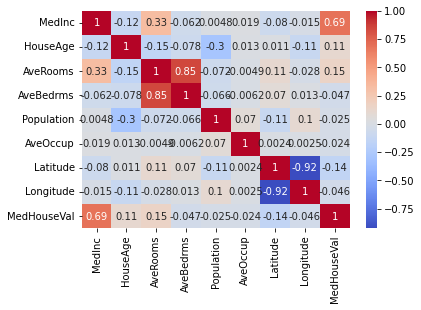

In [101]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

In [102]:
threshold =0.8
hight_corr = (corr_matrix.abs()>threshold) & (corr_matrix.abs()<1.0) 

high_corr_pairs = [(corr_matrix.columns[i], corr_matrix.columns[j]) 
                   for i in range(len(corr_matrix.columns)) 
                   for j in range(i) 
                   if hight_corr.iloc[i, j]]

In [103]:
print("Highly correlated feature pairs:")
print(high_corr_pairs)

Highly correlated feature pairs:
[('AveBedrms', 'AveRooms'), ('Longitude', 'Latitude')]


In [104]:
# df.drop(['AveBedrms', 'AveRooms','Longitude', 'Latitude'],axis=1, inplace=True)

In [105]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## Standarization 

In [106]:
from sklearn.model_selection import train_test_split

In [107]:
X_train , X_test, y_train ,y_test = train_test_split(X,y ,test_size=0.25,random_state=42 )

In [108]:
from sklearn.preprocessing import StandardScaler

scaled = StandardScaler()

In [109]:
X_train_scaled = scaled.fit_transform(X_train)
X_test_scaled = scaled.transform(X_test)

In [110]:
X_test_scaled

array([[-1.15411223, -0.28514924, -0.51346718, ...,  0.06447083,
         0.19367548,  0.28652736],
       [-0.70756701,  0.11133247, -0.16361884, ..., -0.03570466,
        -0.23746391,  0.06179445],
       [-0.20917611,  1.855852  , -0.6022714 , ..., -0.14606959,
         1.00909127, -1.4264368 ],
       ...,
       [-0.89908611,  0.66640687, -0.89340574, ...,  0.12360294,
        -0.76232924,  0.66108221],
       [ 1.58036659, -1.79177974,  0.80393479, ..., -0.04836253,
         1.34181841, -0.73725589],
       [ 1.44652384,  0.58711053,  0.12349223, ..., -0.04755791,
        -0.82325111,  0.5911653 ]])

In [111]:
from sklearn.svm import SVR

In [112]:
svr = SVR()

In [113]:
model = svr.fit(X_train_scaled,y_train)

In [114]:
y_pred = model.predict(X_test)

In [115]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate regression metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
r2 = r2_score(y_test, y_pred)



In [116]:
print(mae)

1.0236686470254401


In [117]:
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Absolute Error: 1.02
Mean Squared Error: 1.47
Root Mean Squared Error: 1.21
R² Score: -0.11


In [118]:
# Your single data point as a NumPy array
single_data_point = np.array([1.000000, -0.119034, 0.326895, -0.062040, 0.004834, 0.018766, -0.079809, -0.015176])

# Convert to a DataFrame with feature names
single_data_point_df = pd.DataFrame([single_data_point])

# Predict the value
predicted_value = model.predict(single_data_point_df)

print(predicted_value)

[2.3077009]


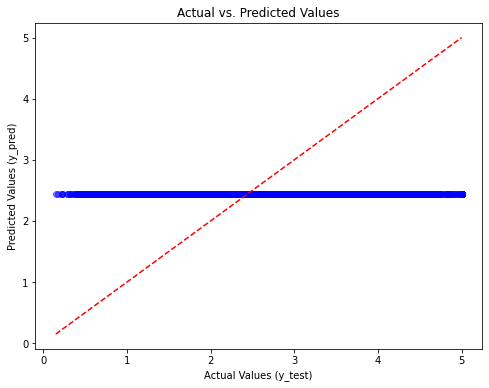

In [121]:
# Scatter plot to compare actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)

# Adding a line y=x for reference
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')

# Setting labels and title
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_pred)")
plt.title("Actual vs. Predicted Values")

# Show the plot
plt.show()


In [120]:
from sklearn.linear_model import LinearRegression

linear = LinearRegression()

In [123]:
model =  linear.fit(X_train_scaled,y_train)

In [129]:
y_pred1=model.predict(X_test_scaled)

In [130]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate regression metrics
mae = mean_absolute_error(y_test, y_pred1)
mse = mean_squared_error(y_test, y_pred1)
rmse = mse**0.5
r2 = r2_score(y_test, y_pred1)



In [131]:
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Absolute Error: 0.53
Mean Squared Error: 0.54
Root Mean Squared Error: 0.74
R² Score: 0.59
